In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

## Data Acquisition

### Connecting to Database

In [2]:
connection = mysql.connector.connect (host = 'localhost',
                                     user = 'root',
                                     passwd = 'DatabaseRoot3306.',
                                     db = 'papers')

In [3]:
connection

### Tables in the database

- List of tables

In [4]:
papers_tables = pd.read_sql_query('SHOW TABLES FROM papers', connection)
print(papers_tables)

  Tables_in_papers
0            issue
1          journal


- Tables description

In [5]:
tables = papers_tables['Tables_in_papers']

In [6]:
for table_names in tables:
    desc = pd.read_sql_query('DESCRIBE {}'.format(table_names), connection)
    print(table_names)
    print(desc, '\n')

issue
                  Field             Type Null  Key Default           Extra
0              issue_id           b'int'   NO  PRI    None  auto_increment
1               user_id   b'varchar(30)'   NO  MUL    None                
2                volume           b'int'  YES         None                
3          issue_number           b'int'  YES         None                
4                  year           b'int'  YES         None                
5           cover_image  b'varchar(200)'  YES         None                
6   reviewers_list_file  b'varchar(200)'  YES         None                
7         special_issue    b'tinyint(1)'   NO         b'0'                
8                status    b'tinyint(1)'   NO         b'1'                
9          date_publish      b'datetime'   NO         None                
10           date_input      b'datetime'  YES         None                
11          date_update      b'datetime'  YES         None                 

journal
         

### Declaring tables into variables

In [7]:
issue_table = pd.read_sql_query('SELECT * FROM issue', connection)

In [8]:
journal_table = pd.read_sql_query('SELECT * FROM journal', connection)

### Showing both tables

In [9]:
print(len(issue_table.index))
issue_table

55


,issue_id,user_id,volume,issue_number,year,cover_image,reviewers_list_file,special_issue,status,date_publish,date_input,date_update
0,3,4dm1n,1,1,2010,None,None,0,0,2014-01-17 10:04:29,2017-03-25 11:37:39,2019-03-04 13:06:05
1,4,4dm1n,2,1,2011,None,None,0,0,2014-01-17 10:15:53,2017-03-25 11:38:02,2019-03-04 13:06:30
2,5,4dm1n,2,2,2011,None,None,0,0,2014-01-17 10:25:37,2017-03-25 11:38:21,2019-03-04 13:06:43
3,6,4dm1n,2,3,2011,None,None,0,0,2014-01-17 10:35:20,2017-03-25 11:38:43,2019-03-04 13:07:14
4,7,secretariatijtech,3,1,2012,None,None,0,0,2014-01-17 11:05:47,2017-03-26 15:24:48,2019-03-04 13:08:04
5,8,secretariatijtech,3,2,2012,None,None,0,0,2014-01-17 10:50:29,2017-03-26 15:25:06,2019-03-04 13:07:37
6,9,secretariatijtech,4,1,2013,None,None,0,0,2014-01-17 13:07:08,2017-03-26 15:25:25,2019-03-04 13:09:54
7,10,secretariatijtech,4,2,2013,None,None,0,0,2014-01-17 11:27:18,2017-03-26 15:25:48,2019-03-04 13:09:35
8,11,secretariatijtech,4,3,2013,None,None,0,0,2014-01-17 11:15:21,2017-03-26 15:26:06,2019-03-04 13:09:17
9,12,secretariatijtech,5,1,2014,None,None,0,0,2014-01-27 14:28:01,2017-03-26 15:26:23,2019-03-01 14:28:01


In [10]:
print(len(journal_table.index))
journal_table

1025


,journal_id,sub_id,issue_id,title,keywords,abstract,introduction,experimental_method,result,conclusion,...,download,doi_url,cite,date_submit,date_revise,date_accept,date_publish,erratum_file,erratum_type,erratum_date
0,1,37,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,,...,1012,https://doi.org/10.14716/ijtech.v8i1.7628,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06 00:00:00,NaT,2016-11-17,2017-01-31 00:00:00,None,None,2020-10-05 16:45:48
1,2,38,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">During the yeast fermentati...","<p align=""justify"">Bioethanol production from ...",...,895,https://doi.org/10.14716/ijtech.v8i1.3948,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20 00:00:00,NaT,2017-01-01,2017-01-31 00:00:00,None,None,2020-10-05 16:31:56
2,4,40,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The model parameters were a...","<p align=""justify"">The temperature had an infl...",...,813,https://doi.org/10.14716/ijtech.v8i1.3233,"Mirwan, A., SusiantoAltway, A., & Handogo, R. ...",2016-02-18 00:00:00,NaT,2017-01-01,2017-01-31 00:00:00,None,None,2020-10-12 02:21:45
3,8,44,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...","<p class=""MsoNormal"" style=""text-align: justif...",...,544,https://doi.org/10.14716/ijtech.v9i1.44,"Sadighi, S., Mohaddecy, S.R.S., Abbasi, A., 20...",2017-08-09 00:00:00,NaT,2018-01-04,2018-01-27 00:00:00,None,None,2020-10-05 16:19:06
4,11,63,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin: 0pt 0pt 0....","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",...,787,https://doi.org/10.14716/ijtech.v8i2.6130,"Seva, R., 2017. Designing a Call Center Traini...",2016-10-21 00:00:00,NaT,2017-01-17,2017-04-29 00:00:00,None,None,2020-10-12 02:30:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1090,4039,64,Edible Coating for Beef Preservation from Chit...,"Chitosan, Edible coating, Liquid smoke, Rice h...","<p class=""AbstracttitleDERJournal"" style=""marg...","<div class=""WordSection1"" style=""line-height: ...",None,,"<p class=""MsoNormal"" style=""text-align: justif...",...,5,https://doi.org/10.14716/ijtech.v11i4.4039,"<font face=""Arial"">Desvita, H., Faisal, M., Ma...",2020-04-17 10:32:26,2020-05-29 12:00:42,NaT,2020-10-16 18:36:52,None,Corrigendum,2020-10-17 12:12:49
1021,1091,4083,64,Curing Characteristics and Physical Properties...,Clay; Dodecylamine; Modified clay; Natural rub...,"<p class=""AbstracttitleDERJournal"" style=""marg...","<p class=""MsoNormal"" style=""text-align: justif...",None,,"<p class=""MsoNormal"" style=""text-align: justif...",...,3,https://doi.org/10.14716/ijtech.v11i4.4083,"<font face=""Arial"">Hasan, A., Aznury, M., Purn...",2020-05-01 16:09:26,2020-05-03 22:17:01,NaT,2020-10-16 18:37:11,None,Corrigendum,2020-10-17 12:13:02
1022,1092,4162,64,Utilization of Dammar-Gum as a Soft Template i...,Dammar-gum; Photocatalyst; Soft template; Tita...,"<p class=""AbstracttitleDERJourn

## Analyzing Data

### Special issue

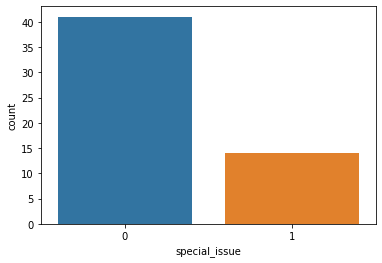

In [11]:
sns.countplot (x = "special_issue", data=issue_table)

special_issue_by_user_id


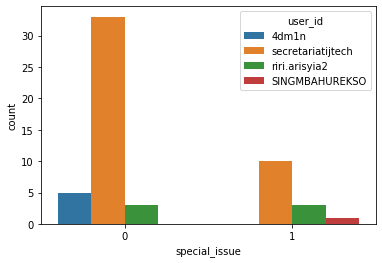

In [12]:
print("special_issue_by_user_id")
sns.countplot (x = "special_issue", hue="user_id", data=issue_table)

special_issue_by_year


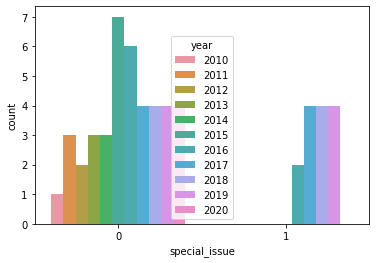

In [13]:
print("special_issue_by_year") 
sns.countplot (x = "special_issue", hue="year", data=issue_table)

### Journals per Issue ID

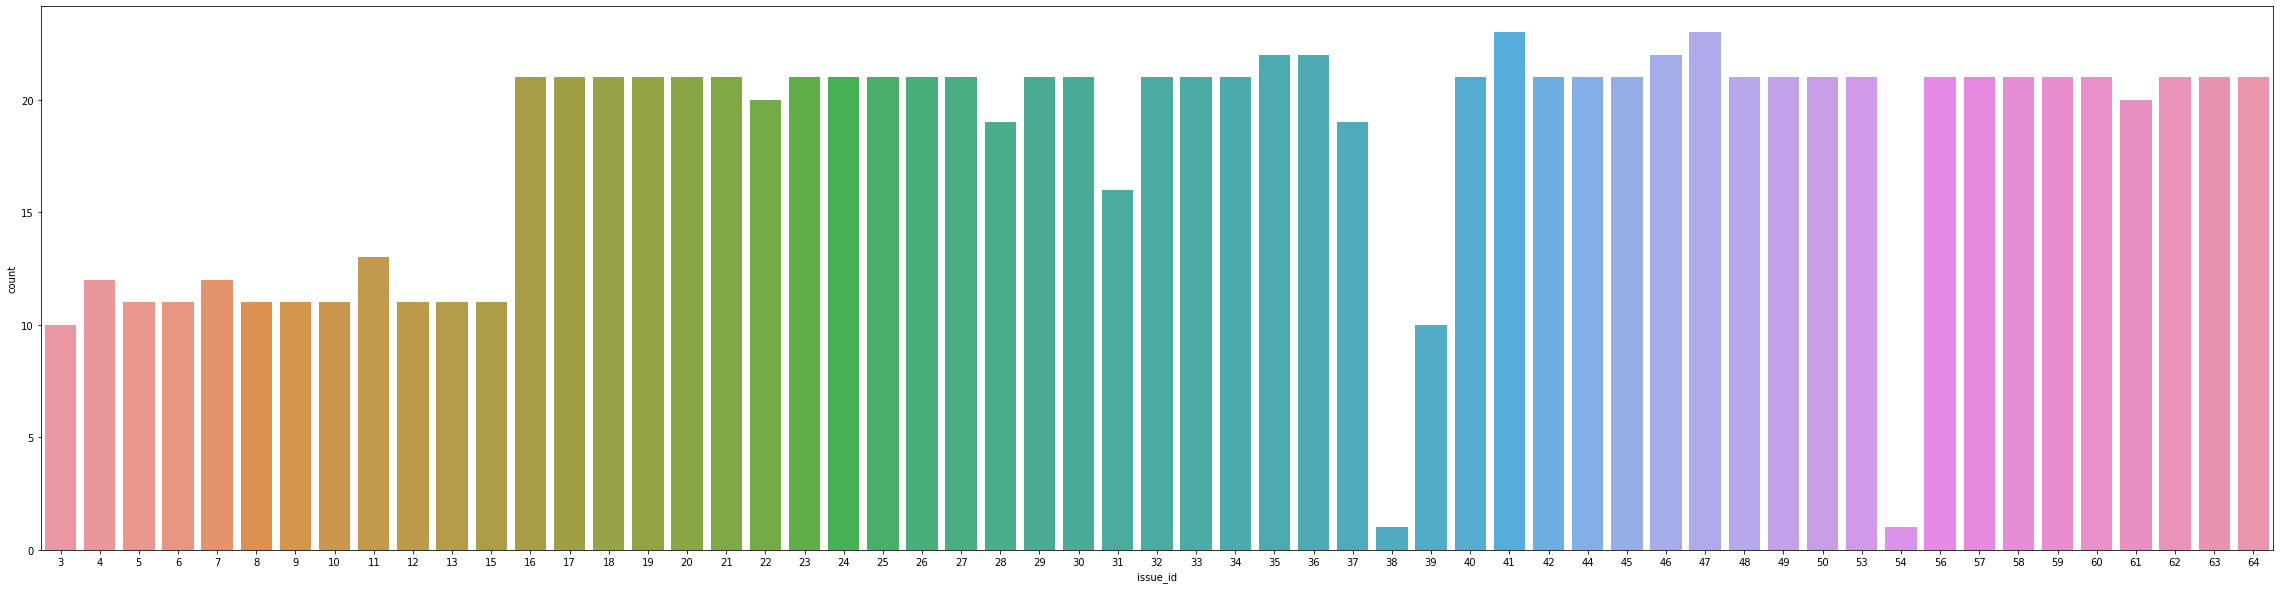

In [14]:
plt.figure(figsize=(40,10))
sns.countplot(x = "issue_id", data=journal_table)

In [15]:
journal_table.isnull().sum()

journal_id                0
sub_id                    0
issue_id                  0
title                     0
keywords                  0
abstract                  0
introduction            590
experimental_method     922
result                    0
conclusion                0
acknowledgement         645
references              235
pdf_file                  0
pages                     0
download                  0
doi_url                   0
cite                      0
date_submit               0
date_revise             632
date_accept             290
date_publish              2
erratum_file           1021
erratum_type            810
erratum_date              2
dtype: int64

In [16]:
download_describe = journal_table["download"].describe()
download_describe

count    1025.000000
mean      455.416585
std       264.936872
min         0.000000
25%       316.000000
50%       399.000000
75%       551.000000
max      2798.000000
Name: download, dtype: float64

## Data Wrangling

In [17]:
journal_table.head(5)

,journal_id,sub_id,issue_id,title,keywords,abstract,introduction,experimental_method,result,conclusion,...,download,doi_url,cite,date_submit,date_revise,date_accept,date_publish,erratum_file,erratum_type,erratum_date
0,1,37,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,,...,1012,https://doi.org/10.14716/ijtech.v8i1.7628,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06,NaT,2016-11-17,2017-01-31,None,None,2020-10-05 16:45:48
1,2,38,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">During the yeast fermentati...","<p align=""justify"">Bioethanol production from ...",...,895,https://doi.org/10.14716/ijtech.v8i1.3948,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20,NaT,2017-01-01,2017-01-31,None,None,2020-10-05 16:31:56
2,4,40,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The model parameters were a...","<p align=""justify"">The temperature had an infl...",...,813,https://doi.org/10.14716/ijtech.v8i1.3233,"Mirwan, A., SusiantoAltway, A., & Handogo, R. ...",2016-02-18,NaT,2017-01-01,2017-01-31,None,None,2020-10-12 02:21:45
3,8,44,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...","<p class=""MsoNormal"" style=""text-align: justif...",...,544,https://doi.org/10.14716/ijtech.v9i1.44,"Sadighi, S., Mohaddecy, S.R.S., Abbasi, A., 20...",2017-08-09,NaT,2018-01-04,2018-01-27,None,None,2020-10-05 16:19:06
4,11,63,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin: 0pt 0pt 0....","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",...,787,https://doi.org/10.14716/ijtech.v8i2.6130,"Seva, R., 2017. Designing a Call Center Traini...",2016-10-21,NaT,2017-01-17,2017-04-29,None,None,2020-10-12 02:30:01


In [18]:
journal_table.drop(['sub_id', 'doi_url', 'date_revise', 'date_accept'], axis=1, inplace=True)

In [19]:
journal_table.drop(['erratum_file', 'erratum_type', 'erratum_date'], axis=1, inplace=True)

In [20]:
journal_table.head(2)

,journal_id,issue_id,title,keywords,abstract,introduction,experimental_method,result,conclusion,acknowledgement,references,pdf_file,pages,download,cite,date_submit,date_publish
0,1,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,,None,None,uploads/submission/manuscript/37/E-37.pdf,1-4,1012,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06,2017-01-31
1,2,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">During the yeast fermentati...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",uploads/submission/manuscript/38/CE-38.pdf,5-18,895,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20,2017-01-31


In [21]:
journal_table.drop(['result', 'pdf_file'], axis=1, inplace=True)

In [22]:
import datetime as dt

In [23]:
journal_table['year_submit'] = journal_table['date_submit'].dt.year
journal_table['year_publish'] = journal_table['date_publish'].dt.year

In [24]:
journal_table.head(2)

,journal_id,issue_id,title,keywords,abstract,introduction,experimental_method,conclusion,acknowledgement,references,pages,download,cite,date_submit,date_publish,year_submit,year_publish
0,1,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,None,None,1-4,1012,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06,2017-01-31,2016,2017.0
1,2,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",5-18,895,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20,2017-01-31,2016,2017.0


In [25]:
journal_table.drop(['date_submit', 'date_publish'], axis=1, inplace=True)

In [26]:
journal_table.head(2)

,journal_id,issue_id,title,keywords,abstract,introduction,experimental_method,conclusion,acknowledgement,references,pages,download,cite,year_submit,year_publish
0,1,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,None,None,1-4,1012,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016,2017.0
1,2,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",5-18,895,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016,2017.0


## Topic Modeling

Here, we are going to process the title of the journals on the table to match them with the relevant topic. The modelling uses LDA algorithm

### Importing Libraries

In [28]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [29]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alxrpatrick/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

### Lemmatizing & Stemming

Here, we are going to lemmatize the words from the title of the journals in order to change the third person into first person, and the past and future tenses to their primary form.

The words are also stemmed to be reduced to their root form

### Function:

In [62]:
stemmer = SnowballStemmer('english')

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >= 3:
            result.append(lemmatize_stemming(token))
    return result

### Selecting the data:

In [60]:
journal_title = journal_table[['journal_id', 'title']]
journal_title.head(5)

,journal_id,title
0,1,Stimulating Innovation and Creativity: The Way...
1,2,A Review of Bioethanol Production from Plant-b...
2,4,A Modified Shrinking Core Model for Leaching o...
3,8,Modeling and Optimizing a Vacuum Gas Oil Hydro...
4,11,Designing a Call Center Training Software for ...


In [63]:
processed = journal_title['title'].map(preprocess)

In [67]:
processed[:10]

0               [stimul, innov, creativ, way, forward]
1    [review, bioethanol, product, plant, base, was...
2    [modifi, shrink, core, model, leach, aluminum,...
3    [model, optim, vacuum, gas, oil, hydrocrack, p...
4    [design, center, train, softwar, visual, impai...
5    [leav, hand, metamateri, lhm, structur, stack,...
6    [exploit, geometr, node, locat, improv, spatia...
7    [role, technolog, achiev, sustain, develop, goal]
8    [comput, analyt, investig, aerodynam, deriv, s...
9    [human, factor, ergonom, design, driver, child...
Name: title, dtype: object

### Creating Bag of Words on the Dataset

In [68]:
dic = gensim.corpora.Dictionary(processed)

In [69]:
dic.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [73]:
bow_corpus = [dic.doc2bow(doc) for doc in processed]

### Creating DTM using TF-IDF

In [74]:
from gensim import corpora, models

In [75]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [76]:
from pprint import pprint

In [80]:
for doc in corpus_tfidf:
    pprint(doc)

[(0, 1.0)]
[(1, 0.2696400706900582),
 (2, 0.4810046181041204),
 (3, 0.4810046181041204),
 (4, 0.3176009012639393),
 (5, 0.4810046181041204),
 (6, 0.36376856912344924)]
[(6, 0.3712075569146552),
 (7, 0.28659209648219175),
 (8, 0.46337458148669064),
 (9, 0.46337458148669064),
 (10, 0.45174568803604825),
 (11, 0.3828364503652975)]
[(3, 0.44513834860681456),
 (7, 0.2599072155934917),
 (12, 0.44513834860681456),
 (13, 0.4148243649248674),
 (14, 0.3720992045906238),
 (15, 0.3444530396279925),
 (16, 0.32705805628416595)]
[(17, 1.0)]
[(18, 1.0)]
[(1, 0.4142284878739431), (19, 0.7276434237144191), (20, 0.5467630270590953)]
[(21, 0.38624115865672576),
 (22, 0.623785556276801),
 (23, 0.4980751369831115),
 (24, 0.4622018012288642)]
[(7, 0.5797301891450697), (25, 0.8148085098928591)]
[(17, 0.5603906711478625), (26, 0.8282284079228677)]
[(7, 0.3784521569002151),
 (27, 0.61189792729427),
 (28, 0.4574194026045164),
 (29, 0.522611118932116)]
[(30, 0.4998040286643031), (31, 0.6124524197563972), (32, 0.6

[(11, 0.3961667941057418),
 (21, 0.3097010954738426),
 (40, 0.3160308600655091),
 (101, 0.46188198509470935),
 (102, 0.5001721483840663),
 (104, 0.4286658978999539)]
[(21, 0.33940961906290956),
 (27, 0.5255068746029055),
 (39, 0.5326314064412919),
 (40, 0.3463465754386318),
 (82, 0.45275983676443765)]
[(7, 0.42477706958500094), (40, 0.9052979847292156)]
[(14, 0.8021814903918008), (40, 0.5970802764057689)]
[(1, 0.49066593799538927), (7, 0.5110625415087946), (29, 0.7057350890792354)]
[(21, 0.6885310675102448), (31, 0.7252068457158981)]
[(6, 0.6301406694127459), (13, 0.776480995744298)]
[(6, 0.4848635770310398), (9, 0.6052502243012063), (71, 0.6313315116893851)]
[(16, 0.31470009260029097),
 (27, 0.4043508433960047),
 (101, 0.7789729475959355),
 (104, 0.36147668538372957)]
[]
[(1, 0.4022602328041383), (39, 0.6866123442660914), (54, 0.6055990371572456)]
[(1, 0.3171454737661102),
 (80, 0.5657483960077552),
 (85, 0.5489860425188168),
 (103, 0.5272208512605033)]
[(11, 0.454488035988509),
 (30,

[(3, 0.5084722655702935),
 (10, 0.46797257472862813),
 (32, 0.32654473939457607),
 (53, 0.3965880895428062),
 (78, 0.5084722655702935)]
[(30, 0.3866449909090661), (75, 0.6485397923892281), (89, 0.655668962733989)]
[(1, 0.44085108438905246), (35, 0.7524825270809167), (40, 0.48930600633030674)]
[(1, 0.3522186721151484),
 (21, 0.3831018572013986),
 (80, 0.628314654555288),
 (99, 0.5782695469185194)]
[(26, 0.6072460162348893), (96, 0.537696342101891), (101, 0.5849230030158692)]
[(0, 0.5480126589005184),
 (4, 0.38329375829674783),
 (100, 0.5632967411012973),
 (106, 0.48524715558176784)]
[(22, 0.4705828005062263),
 (28, 0.33724781332730247),
 (49, 0.3757470663845056),
 (51, 0.43982038183403777),
 (66, 0.3697917600810359),
 (99, 0.43982038183403777)]
[(4, 0.5679639911803076), (77, 0.8230534033235848)]
[(3, 0.39392627981470113),
 (29, 0.3176186106283921),
 (50, 0.3500983084128021),
 (69, 0.7081340089968786),
 (76, 0.346291645874316)]
[(1, 0.6925655411887762), (7, 0.7213549550380155)]
[(60, 0.6

In [23]:
#journal_table['popular'] = journal_table['download'].apply(lambda x: 0 if x <= 455 else 1)

conditions = [
    (journal_table['download'] <= 316),
    (journal_table['download'] > 316) & (journal_table['download'] <= 399),
    (journal_table['download'] > 399) & (journal_table['download'] <= 551),
    (journal_table['download'] > 551)
    ]
values = ['0_to_316', '317_to_399', '400_to_551', 'more_than_551']
journal_table['popular'] = np.select(conditions, values)

In [24]:
journal_table.drop(['download'], axis=1, inplace=True)

In [25]:
journal_table.head(10)

,issue_id,title,keywords,abstract,introduction,experimental_method,conclusion,acknowledgement,references,pages,cite,date_submit,date_publish,popular
0,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,None,None,1-4,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06,2017-01-31,more_than_551
1,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",5-18,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20,2017-01-31,more_than_551
2,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The temperature had an infl...",<p>The experimental work was financially suppo...,"<div align=""justify"">\r\n\t\t\t\t\t\t\t<p>Baba...",19-26,"Mirwan, A., SusiantoAltway, A., & Handogo, R. ...",2016-02-18,2017-01-31,more_than_551
3,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...",None,"<p class=""MsoNormal"" style=""text-align: justif...",99-109,"Sadighi, S., Mohaddecy, S.R.S., Abbasi, A., 20...",2017-08-09,2018-01-27,400_to_551
4,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",,"<p class=""MsoNormal"" style=""margin-top:6.0pt;m...",212-220,"Seva, R., 2017. Designing a Call Center Traini...",2016-10-21,2017-04-29,more_than_551
5,25,Left-Handed Metamaterial (LHM) Structure Stack...,Array antenna; Metamaterial structure; Microst...,Antenna can be one of the largest components i...,None,None,,None,"<div>\r\n\t\t\t\t\t\t\t<p>Balanis, C.A., 2005....",683-690,"Zulkifli, F.Y., Saputro, N.A., Basari., &amp; ...",2015-06-17,2016-04-29,400_to_551
6,15,Exploiting Geometrical Node Location for Impro...,Approximation algorithm; Geometrical node loca...,"<div align=""justify"">This paper proposes a nov...",None,None,,None,"<div>\r\n\t\t\t\t\t\t\t<p>Adriansyah, N.M., As...",53-62,"<p>Adriansyah, N., Asvial, M., Budiarjo, B., ...",2014-12-11,2015-01-28,400_to_551
7,32,The Role of Technology in Achieving Sustainabl...,Technology Development; Policy and Strategy; S...,The Sustainable Development Goals (SDGs) estab...,None,None,,None,None,362-365,"Berawi, M.A. 2017. The Role of Technology in A...",2017-04-29,2017-04-29,more_than_551
8,32,Computational and Analytical Investigation of ...,Damping derivatives; Hypersonic flow; Piston t...,This research paper presents a computational a...,None,None,,None,None,366-375,"Bashir, M., Khan, S., Azam, Q.., Janvekar, A.A...",2016-11-10,2017-04-29,more_than_551
9,31,Human Factors and Ergonomic Design for Drivers...,,"<div align=""justify"">In this special edition, ...",None,None,,None,None,209-211,"Surjandari, I., Zagloel, T.Y., 2017. Human Fac...",2017-04-28,2017-04-29,more_than_551


In [26]:
popularity = pd.get_dummies(journal_table['popular'], drop_first=True)
popularity.head(5)

,317_to_399,400_to_551,more_than_551
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1


In [27]:
journal_table = pd.concat([journal_table, popularity], axis=1)
journal_table.drop(['popular'], axis=1,inplace=True)

In [28]:
journal_table.head(5)

,issue_id,title,keywords,abstract,introduction,experimental_method,conclusion,acknowledgement,references,pages,cite,date_submit,date_publish,317_to_399,400_to_551,more_than_551
0,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,None,None,1-4,"Ali Berawi, M. 2017. Stimulating Innovation an...",2016-10-06,2017-01-31,0,0,1
1,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",5-18,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",2016-04-20,2017-01-31,0,0,1
2,30,A Modified Shrinking Core Model for Leaching o...,Aluminum; Leaching; Recovery; Shrinking core m...,"<p align=""justify"">The kinetics of aluminum le...","<p align=""justify"">Sludge solid waste of drink...","<p align=""justify""><b>2.1. Materia</b></p><p a...","<p align=""justify"">The temperature had an infl...",<p>The experimental work was financially suppo...,"<div align=""justify"">\r\n\t\t\t\t\t\t\t<p>Baba...",19-26,"Mirwan, A., SusiantoAltway, A., & Handogo, R. ...",2016-02-18,2017-01-31,0,0,1
3,40,Modeling and Optimizing a Vacuum Gas Oil Hydro...,Artificial neural network; Hydrocracking; Mode...,"<p class=""MsoNormal"" style=""text-align: justif...",<p><br></p>,"<p class=""Text"" style=""text-align: justify; te...","<p class=""MsoNormal"" style=""text-align: justif...",None,"<p class=""MsoNormal"" style=""text-align: justif...",99-109,"Sadighi, S., Mohaddecy, S.R.S., Abbasi, A., 20...",2017-08-09,2018-01-27,0,1,0
4,31,Designing a Call Center Training Software for ...,Design; Software design; Usability; User-cente...,"<div align=""justify"">Existing software develop...","<div class=""WordSection1"">\r\n\r\n<p class=""SE...","<p class=""Text"" style=""margin-bottom:6.0pt;tex...","<p class=""MsoNormal"" style=""margin-bottom: 0.0...",,"<p class=""MsoNormal"" style=""margin-top:6.0pt;m...",212-220,"Seva, R., 2017. Designing a Call Center Traini...",2016-10-21,2017-04-29,0,0,1


In [33]:
journal_table.head(2)

,issue_id,title,keywords,abstract,introduction,experimental_method,conclusion,acknowledgement,references,pages,cite,317_to_399,400_to_551,more_than_551,year_submit,year_publish
0,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",None,None,,None,None,1-4,"Ali Berawi, M. 2017. Stimulating Innovation an...",0,0,1,2016,2017.0
1,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...","<p align=""justify"">In terms of organic chemist...","<p align=""justify""><b>POTENTIAL CANDIDATES FOR...","<p align=""justify"">Bioethanol production from ...",<p>The Brunei Darussalam Government Scholarshi...,"<p align=""justify""><br></p><div align=""justify...",5-18,"Hossain, N., Zaini, ., & Mahlia, T. 2017. A R...",0,0,1,2016,2017.0


In [34]:
journal_table['hasIntroduction'] = journal_table['introduction'].apply(lambda x: 0 if x == None else 1)
journal_table['hasMethod'] = journal_table['experimental_method'].apply(lambda x: 0 if x == None else 1)
journal_table['hasConclusion'] = journal_table['conclusion'].apply(lambda x: 0 if x == None else 1)
journal_table['hasAck'] = journal_table['acknowledgement'].apply(lambda x: 0 if x == None else 1)
journal_table['hasReferences'] = journal_table['references'].apply(lambda x: 0 if x == None else 1)

In [35]:
journal_table.drop(['introduction', 'experimental_method', 'conclusion', 'acknowledgement', 'references'], 
                   axis=1, 
                   inplace=True)

In [50]:
journal_table.head(2)

,issue_id,title,keywords,abstract,pages,317_to_399,400_to_551,more_than_551,year_submit,year_publish,hasIntroduction,hasMethod,hasConclusion,hasAck,hasReferences
0,30,Stimulating Innovation and Creativity: The Way...,editorial,"<p align=""justify"">One of the most difficult c...",1-4,0,0,1,2016,2017.0,0,0,1,0,0
1,30,A Review of Bioethanol Production from Plant-b...,Bioethanol; Conversion process; Lignocelluosic...,"<p align=""justify"">Commercialization of bioeth...",5-18,0,0,1,2016,2017.0,1,1,1,1,1


In [52]:
journal_table.drop(["cite"], axis=1, inplace=True)

KeyError: "['cite'] not found in axis"

In [53]:
journal_table.drop(["pages"], axis=1, inplace=True)

## Train Data

In [54]:
X = journal_table.drop(["317_to_399", "400_to_551", "more_than_551"],axis=1)
y = journal_table[["317_to_399", "400_to_551", "more_than_551"]]

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [58]:
logmodel.fit(X_train, y_train)

ValueError: could not convert string to float: '<p>Hydrogen is one of chemical industry feedstock and automobile fuel, which is commonly produced by electrolysis. Electrolysis, however, has several constraints that are primarily due to its large energy requirement. Plasma electrolysis is a breakthrough method that not only improves hydrogen production but also suppresses energy consumption. This research has been conducted to investigate the effectiveness of plasma electrolysis on hydrogen product quantity and energy consumption by varying the voltage and glycerol concentration. The results of this research showed that an increase in voltage led to increased hydrogen production and energy consumption; the addition of glycerol caused a decrease in hydrogen production but still resulted in an increase in energy consumption. The process effectiveness of plasma electrolysis at 300V and 0.1M KOH was 8.1 times higher than Faraday electrolysis.<span style="color: rgb(102, 102, 102); font-family: &quot;Segoe UI Light&quot;, SegoeUILightWF, sans-serif; font-size: 15px; font-style: normal; font-variant-ligatures: normal; font-variant-caps: normal; font-weight: 400; letter-spacing: normal; orphans: 2; text-align: justify; text-indent: 0px; text-transform: none; white-space: normal; widows: 2; word-spacing: 0px; -webkit-text-stroke-width: 0px; background-color: rgb(255, 255, 255); text-decoration-style: initial; text-decoration-color: initial; display: inline !important; float: none;"></span></p>'